# **CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs**

Author - Rithik K.

## **PROBLEM STATEMENT**

### **Q. You have to predict that the given images belong to which classes among the 10 classes.**

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

    0] Airplanes
    1] Cars
    2] Birds
    3] Cats
    4] Deer
    5] Dogs
    6] Frogs
    7] Horses
    8] Ships
    9] Trucks

The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

CIFAR-10 is widely used for machine learning and computer vision applications.

The dataset consists of 60,000 32x32 color images and 6,000 images of each class.

Images have low resolution (32x32).

Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

# **STEP 01** import libraries/dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.datasets import cifar10
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

# **STEP 02** data vitualization

[5]


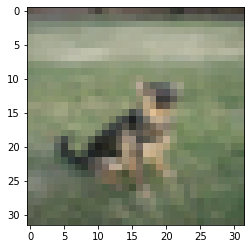

In [ ]:
i = 25418
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


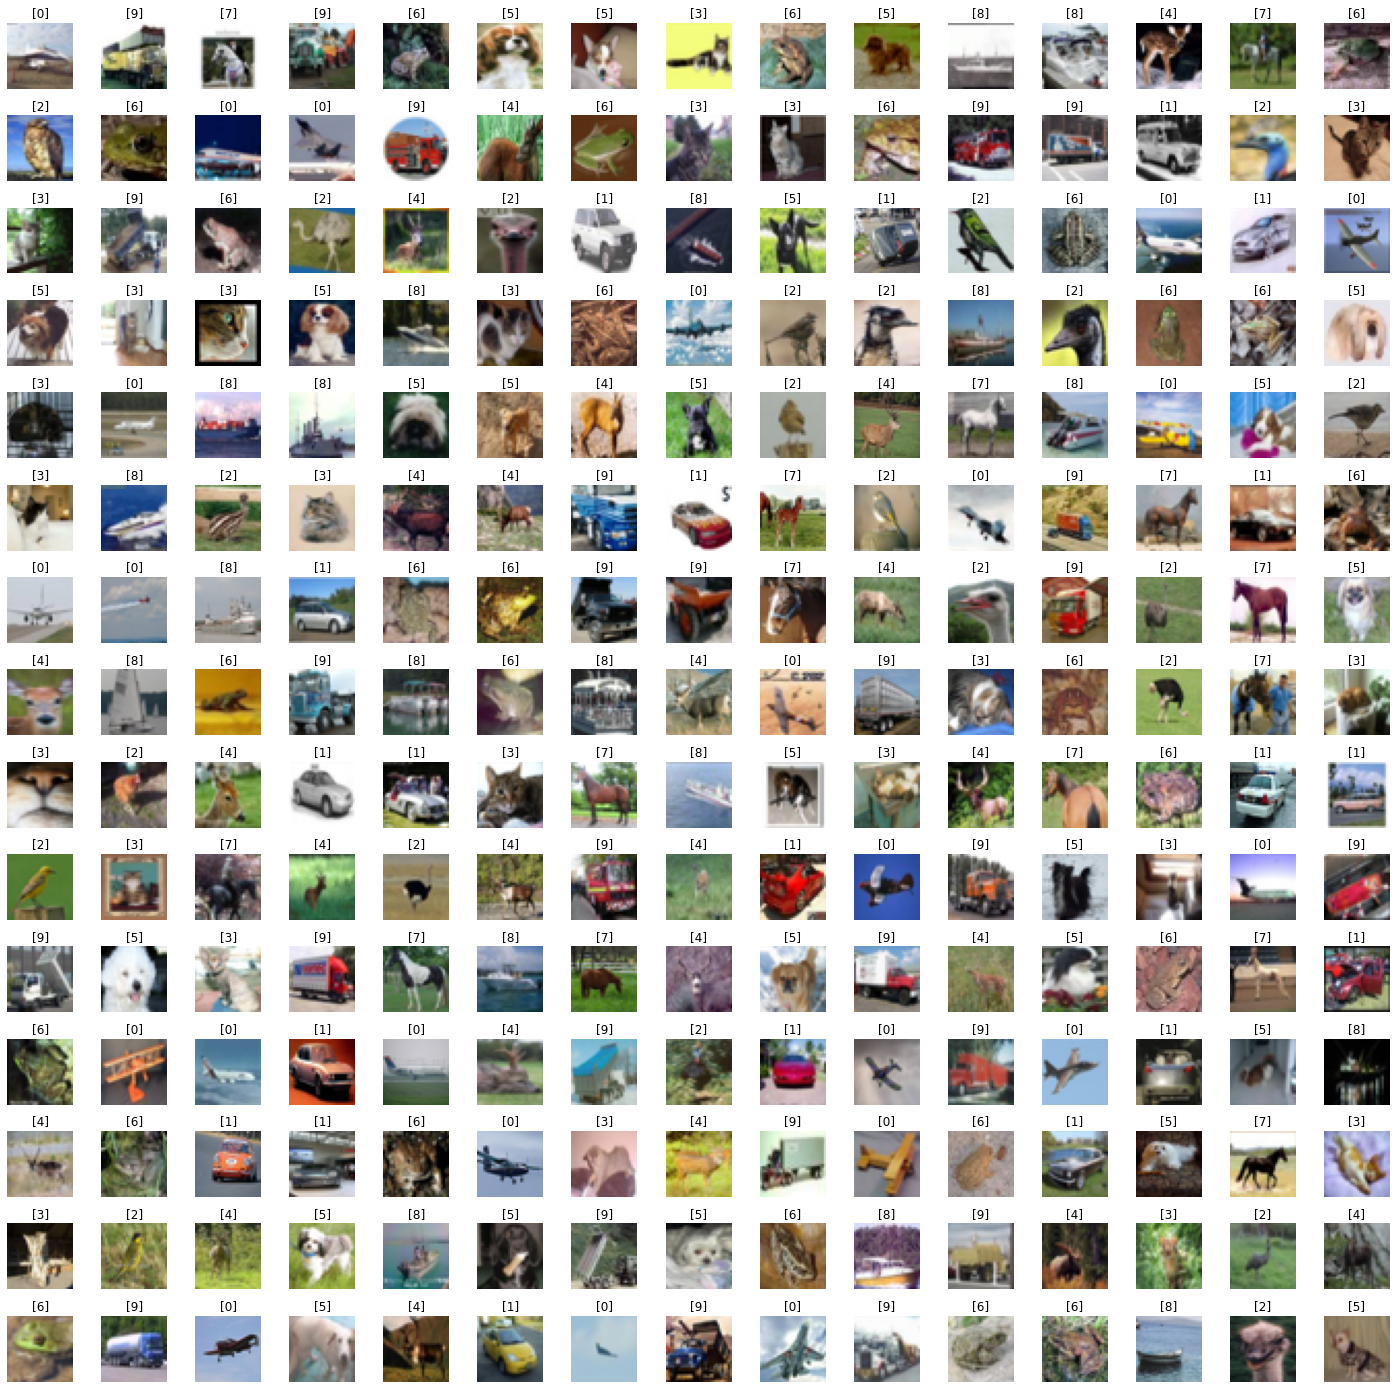

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid , W_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid * W_grid):
  index = np.random.randint(0,n_training) # pick a random number
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4)

# **STEP 03** data preparation

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

number_cat = 10 # number of categories of images which is 10

In [ ]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [ ]:
X_test

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
Input_shape = X_train.shape[1:]

In [ ]:
Input_shape

(32, 32, 3)

# **STEP 04** train the model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
from keras.backend import flatten
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape = Input_shape))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 5, shuffle = True)

Epoch 1/5
1563/1563 [==============================] - 377s 240ms/step - loss: 1.5981 - accuracy: 0.4210
Epoch 2/5
1563/1563 [==============================] - 357s 228ms/step - loss: 1.2412 - accuracy: 0.5648
Epoch 3/5
1563/1563 [==============================] - 357s 228ms/step - loss: 1.1293 - accuracy: 0.6116
Epoch 4/5
1563/1563 [==============================] - 359s 230ms/step - loss: 1.0663 - accuracy: 0.6360
Epoch 5/5
1563/1563 [==============================] - 355s 227ms/step - loss: 1.0338 - accuracy: 0.6456


# **STEP 05** evaluating the model

In [ ]:
evaluation = model.evaluate(X_test, y_test)
print("Test Accuracy : {}".format(evaluation[1]))  

313/313 [==============================] - 17s 55ms/step - loss: 1.1483 - accuracy: 0.6219
Test Accuracy : 0.6219000220298767


In [ ]:
predicted_classes = model.predict(X_test)
predicted_classes

313/313 [==============================] - 17s 54ms/step


array([[8.7081949e-04, 1.2033529e-02, 9.2176069e-03, ..., 5.1005610e-04,
        2.3802595e-02, 7.4268058e-03],
       [1.6060399e-03, 2.4218202e-01, 2.9884402e-05, ..., 9.4716768e-08,
        7.4434119e-01, 1.1631251e-02],
       [6.8368994e-02, 1.1532016e-01, 8.1540225e-03, ..., 2.8440770e-04,
        6.4688379e-01, 1.2642233e-01],
       ...,
       [5.9470720e-05, 8.2709676e-06, 2.0715822e-02, ..., 1.6724277e-02,
        1.1370272e-05, 6.0035327e-05],
       [1.1857422e-02, 8.8088906e-01, 7.6088374e-03, ..., 5.8103312e-04,
        1.0791523e-03, 3.1639744e-02],
       [8.6442064e-08, 1.8131900e-11, 6.2005311e-06, ..., 9.6000326e-01,
        5.6703080e-11, 2.8020999e-08]], dtype=float32)

In [ ]:
predicted_classes = predicted_classes.argmax(1)

In [ ]:
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

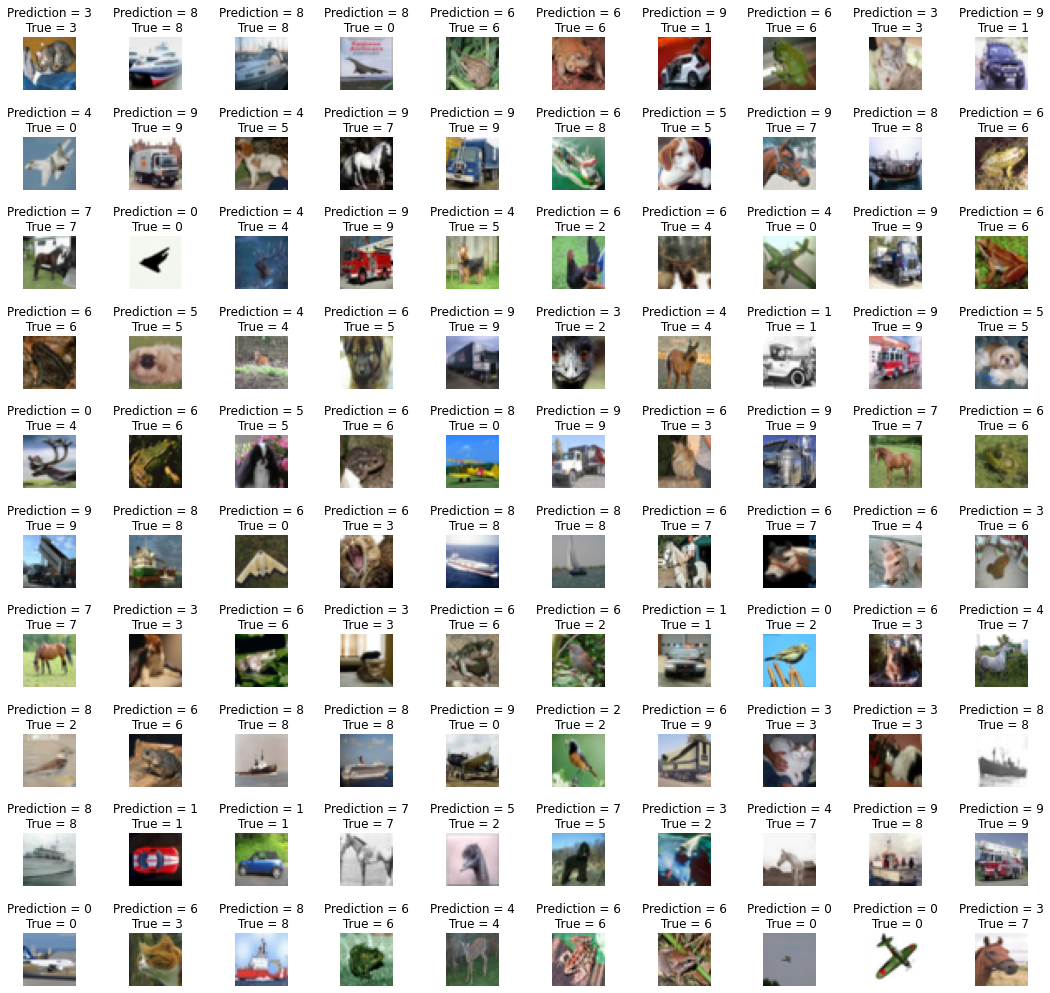

In [ ]:
L = 10
W = 10
fig, axes = plt.subplots(L,W,figsize = (18, 18))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)


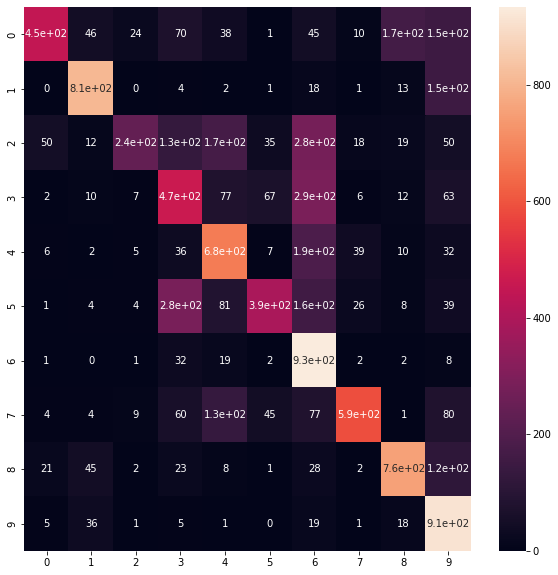

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
 
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

# **STEP 06** saving model

In [ ]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)

model_path = os.path.join(directory, 'keras_cifr10_trained_model.h5')
model.save(model_path)

# **STEP 07** improving the model with data augmentation

    1] Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images.
    2] Augmentations also include shifting and changing the brightness of the images.

# **STEP 07.1** data augmentation for cifar-10 dataset

In [ ]:
import keras
from keras.datasets import cifar10
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
n = 8
X_train_sample = X_train[:n]

In [ ]:
X_train_sample.shape

(8, 32, 32, 3)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip = True)
# dataget_train = ImageDataGenerator(height_shift_range = 0.5)
# dataget_train = ImageDataGenerator(brightness_range = (1,3))

dataget_train.fit(X_train_sample)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
  


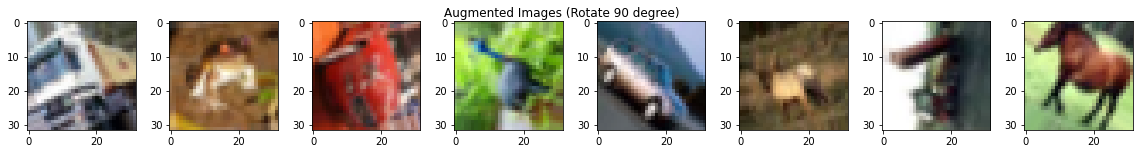

In [ ]:
from scipy.misc import toimage
fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
  for i in range(0,n):
    ax = fig.add_subplot(1, n, i+1)
    ax.imshow(toimage(x_batch[i]))

  fig.suptitle('Augmented Images (Rotate 90 degree)')
  plt.show()
  break

# **STEP 07.2** model training using augmented dataset

In [ ]:
from keras.datasets import cifar10
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

number_cat = 10 # number of categories of images which is 10

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
y_test = y_test.argmax(1) #donot need to do this line of code

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True)

In [ ]:
datagen.fit(X_train)

In [ ]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


1563/1563 [==============================] - 429s 274ms/step - loss: 1.7193 - accuracy: 0.3850
Epoch 2/5
1563/1563 [==============================] - 394s 252ms/step - loss: 1.6321 - accuracy: 0.4182
Epoch 3/5
1563/1563 [==============================] - 396s 253ms/step - loss: 1.5897 - accuracy: 0.4303
Epoch 4/5
1563/1563 [==============================] - 388s 248ms/step - loss: 1.5707 - accuracy: 0.4429
Epoch 5/5
1563/1563 [==============================] - 390s 250ms/step - loss: 1.5573 - accuracy: 0.4461


In [ ]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy : ',score[1])

313/313 [==============================] - 19s 60ms/step - loss: 1.3877 - accuracy: 0.5035
Test Accuracy :  0.5034999847412109


In [ ]:
# save the model
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)

model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
model.save(model_path)

# **JOB DONE....**
